# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais. A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solução é rastrear os dados em tempo real, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informações dispostas nesse dataset, realizaremos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

# 1. Instalação / Setup

Para o início do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma célula de conexão com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisará do dataset baixado.

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


Aqui nós fazemos as importações para tratamento dos dados e modelagem do Bag of Words, para logo depois aplicar o algoritmo de Naive Bayes.

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import seaborn as sns
import pickle

from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, make_scorer, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import nltk
import spacy
import gensim
from scipy.spatial.distance import cosine
from gensim.models import KeyedVectors

import pycaret
from pycaret.classification import *
from pycaret.classification import setup
from pycaret import classification

# 2. Entendimento e Tratamento dos Dados

Rodando o dataset, para analisar seu conteúdo:

In [9]:
df = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/nova_base_tratada2')
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']"
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel..."
...,...,...,...
8035,perspectiveinvestimentos,2,"['excelente', 'explicação']"
8036,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
8037,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion..."
8038,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o..."


In [10]:
df.columns

Index(['autor', 'sentimento', 'texto_tratado'], dtype='object')

In [11]:
df['texto_tratado'] = df['texto_tratado'].str.replace("'", "")
df['texto_tratado']

0       [alvarez, marsal, estar, conosco, sportainmet,...
1       [btgpactual, with, make_repost, entendar, impa...
2                                   [minuto, touro, ouro]
3                   [querer, saber, banking, administrar]
4       [início, guerra, rússia, ucrânia, velho, apare...
                              ...                        
8035                              [excelente, explicação]
8036                      [atendar, telefone, amor, deus]
8037    [grande, fiis, mercado, não, selecionar, princ...
8038    [erro, financeiro, eliminar, parar, ostentar, ...
8039    [morning, call, não, aparecer, spotify, atuali...
Name: texto_tratado, Length: 8040, dtype: object

In [12]:
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, make_repost, entendar, impa..."
2,lmviapiana,2,"[minuto, touro, ouro]"
3,ricktolledo,2,"[querer, saber, banking, administrar]"
4,donadabolsaoficial,0,"[início, guerra, rússia, ucrânia, velho, apare..."
...,...,...,...
8035,perspectiveinvestimentos,2,"[excelente, explicação]"
8036,eduardocolares,2,"[atendar, telefone, amor, deus]"
8037,danielucm,2,"[grande, fiis, mercado, não, selecionar, princ..."
8038,amgcapitalinvest,1,"[erro, financeiro, eliminar, parar, ostentar, ..."


## 2.1 Visualização dos dados

### Autores que mais comentam

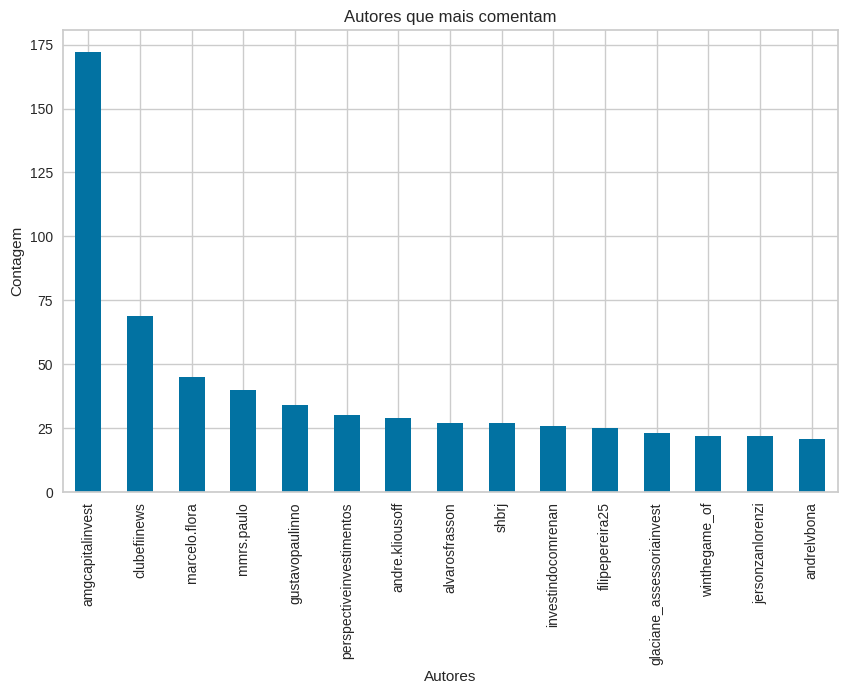

In [13]:
# Contagem de palavras
autor_counts = df['autor'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(15).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

# 3. Bag of Words (BoW)

O modelo Bag of Words (BoW) é uma técnica utilizada em processamento de linguagem natural para representar um texto como um conjunto de palavras desordenadas, ignorando a ordem e a estrutura gramatical das frases. 

Nesse modelo, cada palavra única do texto é transformada em uma "feature" (característica), e a frequência de cada palavra no texto é usada como um valor numérico para a feature correspondente.

Por exemplo, a frase "O gato preto pulou o muro" seria representada como um conjunto de palavras desordenadas: `'o', 'gato', 'preto', 'pulou', 'o', 'muro'`. A frequência de cada palavra seria contada, e o resultado seria um vetor numérico que representa a frequência de cada palavra na frase.


## 3.1 Teste isolado

In [14]:
# Multiple documents
text = ["Estamos fazendo um projeto pro BTG!", "Somos alunos de Sistemas de Informação do Inteli", "O Renato é o nosso orientador", "O Hayashi é o nosso professor de programação"] 

# create the transform
vectorizer = CountVectorizer()

# tokenize and build vocab
vectorizer.fit(text)

# summarize
print(sorted(vectorizer.vocabulary_))

# encode document
vector = vectorizer.transform(text)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

['alunos', 'btg', 'de', 'do', 'estamos', 'fazendo', 'hayashi', 'informação', 'inteli', 'nosso', 'orientador', 'pro', 'professor', 'programação', 'projeto', 'renato', 'sistemas', 'somos', 'um']
(4, 19)
[[0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 2 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0]]


**AVISO**:
O modelo Bag of Words é uma técnica simples e eficiente para representar textos em formato vetorial, o que permite utilizá-los em algoritmos de aprendizado de máquina. 

No entanto, essa abordagem ignora informações importantes sobre a estrutura e o significado das frases, como a ordem das palavras e as relações sintáticas entre elas. Por isso, é comum utilizar técnicas mais avançadas, como a modelagem de tópicos (topic modeling) e as redes neurais, para lidar com textos mais complexos.

Porém, para vieses acadêmicos, estamos implementando e aprendendo como é o funcionamento desse processo.

## 3.2 Definição da Função


In [15]:
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, make_repost, entendar, impa..."
2,lmviapiana,2,"[minuto, touro, ouro]"
3,ricktolledo,2,"[querer, saber, banking, administrar]"
4,donadabolsaoficial,0,"[início, guerra, rússia, ucrânia, velho, apare..."
...,...,...,...
8035,perspectiveinvestimentos,2,"[excelente, explicação]"
8036,eduardocolares,2,"[atendar, telefone, amor, deus]"
8037,danielucm,2,"[grande, fiis, mercado, não, selecionar, princ..."
8038,amgcapitalinvest,1,"[erro, financeiro, eliminar, parar, ostentar, ..."


In [16]:
def bow(frases):
    # Inicializa o CountVectorizer
    vectorizer = CountVectorizer()

    # Concatena os tokens de cada frase em uma única string
    frases_concatenadas = [''.join(tokens) for tokens in frases]

    # Cria o modelo Bag of Words
    bow_model = vectorizer.fit_transform(frases_concatenadas)

    # Dicionário de palavras
    dicionario = vectorizer.vocabulary_

    return bow_model, dicionario

# Aplicar a função de Bag of Words
bow_model, dicionario = bow(df['texto_tratado'].tolist())

## 3.3 Testes das funções


In [17]:
bow_model, dicionario

(<8040x18459 sparse matrix of type '<class 'numpy.int64'>'
 	with 145170 stored elements in Compressed Sparse Row format>,
 {'alvarez': 735,
  'marsal': 10926,
  'estar': 6432,
  'conosco': 3932,
  'sportainmet': 16172,
  'labsr': 9961,
  'evento': 6593,
  'sportainment': 16171,
  'américar': 863,
  'latino': 10040,
  'parceria': 12709,
  'hubstage': 8552,
  'bichar': 2086,
  'motta': 11599,
  'advogado': 368,
  'win': 18071,
  'the': 16750,
  'game': 7726,
  'participe': 12747,
  'online': 12367,
  'gratuito': 8108,
  'março': 10946,
  'inscreva': 9110,
  'link': 10302,
  'bio': 2110,
  'btgpactual': 2490,
  'with': 18086,
  'make_repost': 10701,
  'entendar': 6104,
  'impacto': 8765,
  'conflito': 3884,
  'rússia': 15320,
  'ucrânio': 17275,
  'cenário': 3097,
  'global': 7949,
  'live': 10334,
  'inédito': 9383,
  'amanhã': 767,
  'anatole': 894,
  'kaletsky': 9837,
  'sócio': 16470,
  'fundador': 7607,
  'economista': 5686,
  'chefe': 3221,
  'gavekal': 7786,
  'research': 14845,
 

- A cada vetor, é uma palavra diferente. Veja os exemplos abaixo:

In [18]:
peso_procurado = 19384
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

None


In [19]:
peso_procurado = 19380
palavra_procurada = None

for palavra, peso in dicionario.items():
    if peso == peso_procurado:
        palavra_procurada = palavra
        break

print(palavra_procurada)

None


In [20]:
# Imprime o vocabulário de palavras construído a partir do dataset
print("Dicionário de palavras:")
print(dicionario, "\n")

# Imprime a matriz Bag of Words
print("Representação Bag of Words:")
print(bow_model.toarray())

Dicionário de palavras:
{'alvarez': 735, 'marsal': 10926, 'estar': 6432, 'conosco': 3932, 'sportainmet': 16172, 'labsr': 9961, 'evento': 6593, 'sportainment': 16171, 'américar': 863, 'latino': 10040, 'parceria': 12709, 'hubstage': 8552, 'bichar': 2086, 'motta': 11599, 'advogado': 368, 'win': 18071, 'the': 16750, 'game': 7726, 'participe': 12747, 'online': 12367, 'gratuito': 8108, 'março': 10946, 'inscreva': 9110, 'link': 10302, 'bio': 2110, 'btgpactual': 2490, 'with': 18086, 'make_repost': 10701, 'entendar': 6104, 'impacto': 8765, 'conflito': 3884, 'rússia': 15320, 'ucrânio': 17275, 'cenário': 3097, 'global': 7949, 'live': 10334, 'inédito': 9383, 'amanhã': 767, 'anatole': 894, 'kaletsky': 9837, 'sócio': 16470, 'fundador': 7607, 'economista': 5686, 'chefe': 3221, 'gavekal': 7786, 'research': 14845, 'joão': 9729, 'scandiuzzi': 15526, 'estrategista': 6487, 'wealth': 18011, 'management': 10727, 'moderação': 11462, 'daniel': 4624, 'cunha': 4499, 'vivo': 17878, 'canal': 2720, 'youtube': 1817

In [21]:
# Converte a matriz 
bow_array = bow_model.toarray()

# Cria um novo DataFrame a partir do Bag of words construído
bow = pd.DataFrame(bow_array)

# Define o índice do DataFrame 'bow' para ser o mesmo que o DataFrame 'sentimento', já que a coluna sentimento está de acordo com o índice de cada palavra
bow.index = df.index
bow['sentimento'] = df['sentimento']

# Exibir o DataFrame resultante
bow

,0,1,2,3,4,5,6,7,8,9,...,18450,18451,18452,18453,18454,18455,18456,18457,18458,sentimento
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### No dataframe acima, pode-se ver que foram selecionadas 19.393 palavras para servir como análise. 

- Nota: Tenha em mente que quanto mais palavras (de qualidade) se tenha, melhor será a análise e desenvolvimento do resultado IA.

- Análise de frequência das palavras a partir de uma função.



In [22]:
def bow_dataframe(input):
    tokenizer = Tokenizer() # usando o tokenizer da biblioteca do keras
    tokenizer.fit_on_texts(input) # fitando o tokenizer com o que será passado como parâmetro
    wordCount = tokenizer.word_counts # pegando a contagem de palavras do tokenizer
    dfCountBoW = pd.DataFrame(list(wordCount.items())) # transformando em dataframe para melhor visualização
    dfCountBoW.rename(columns={0: "Palavra", 1:"Frequência"}, inplace=True) # renomeando as colunas 
    final_df = dfCountBoW.sort_values(by=['Frequência'], ascending=False) # ordenando o dataframe
    return final_df

- Aqui iremos plotar um dataframe para mostrar a frequência de palavras.
- Temos os vetores como índice, a palavra respectiva e a frequência dela na matriz.

In [23]:
output = bow_dataframe(df['texto_tratado'])
output.head(20)

,Palavra,Frequência
25,btgpactual,2802
60,não,2339
96,banco,1314
135,investimento,1139
248,mercado,904
215,bom,850
249,financeiro,831
6,evento,797
149,fundo,709
242,brasil,700


# 4. Plotagem de Gráficos

- Agora irei plotar uma nuvem de palavras para melhor visualização das palavras mais frequentes de acordo com a matriz

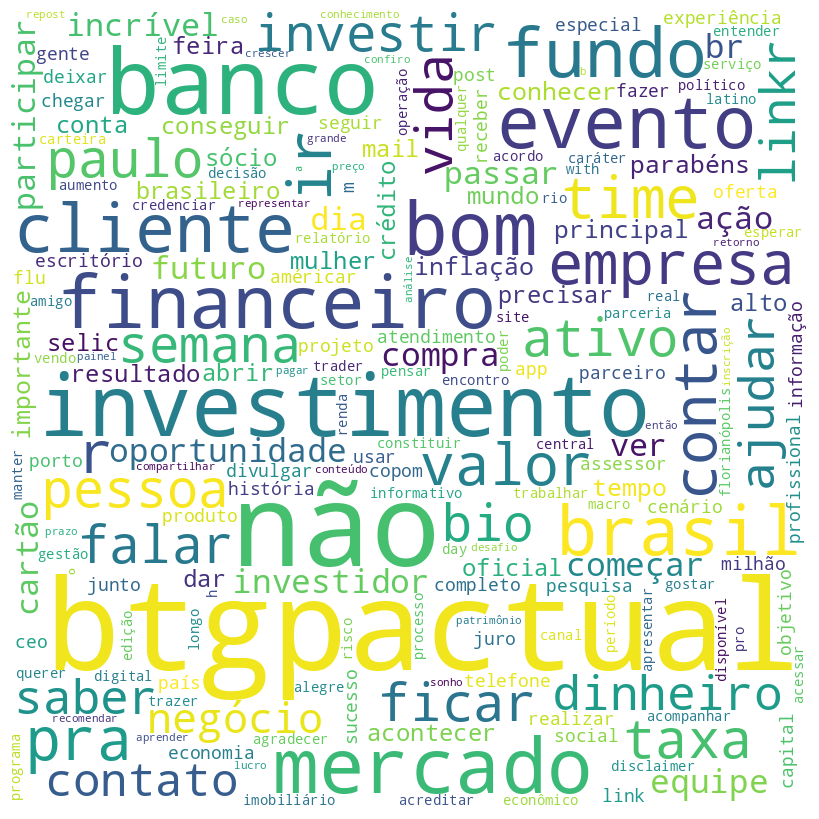

In [24]:
# Criar uma lista das palavras e suas frequências a partir do DataFrame de saída
palavras = output['Palavra'].tolist()
frequencias = output['Frequência'].tolist()

# Criar um dicionário de palavras e frequências, aqui as palavras são as chaves e as frequências são os valores
dicionario_palavras = {palavras[i]: frequencias[i] for i in range(len(palavras))}

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(dicionario_palavras)

# Plotar a nuvem de palavras
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

- Agora irei plotar uma gráfico de barras como uma forma alternativa de visualização.

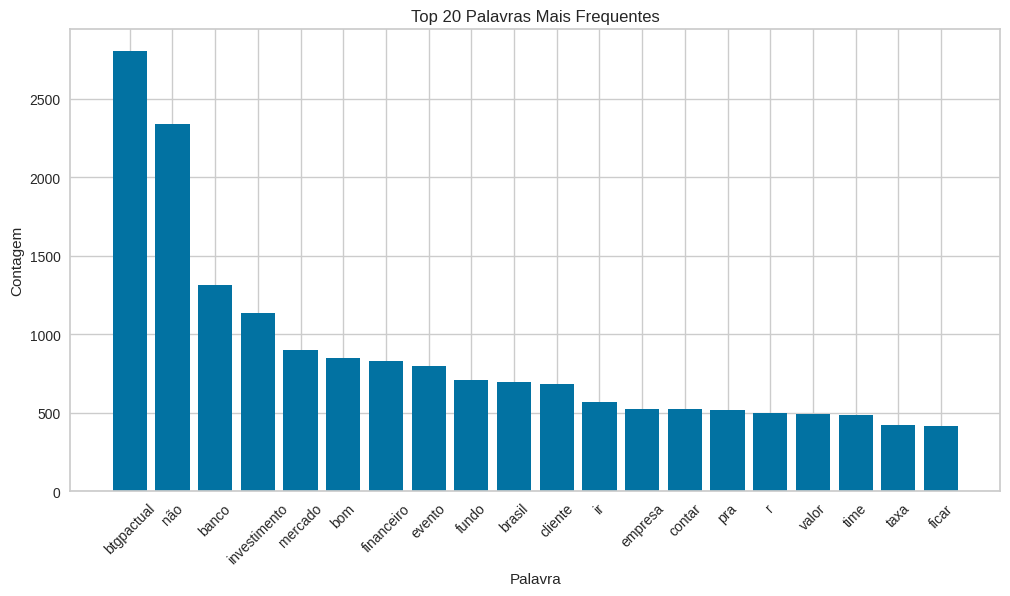

In [25]:
# Obter as palavras e suas frequências do DataFrame de saída
palavras = output['Palavra'].tolist()
frequencias = output['Frequência'].tolist()

# Plotagem do gráfico de barras, com as 20 palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(range(20), frequencias[:20])
plt.xticks(range(20), palavras[:20], rotation=45)  # Definir os rótulos do eixo x como os nomes das palavras
plt.xlabel('Palavra')
plt.ylabel('Contagem')
plt.title('Top 20 Palavras Mais Frequentes')
plt.show()

# 5. BoW + XGboost

## XGboost

- Estarei testando o modelo XGboost e plotando os resultados de cada sentimento para 3 diferentes métricas de acurácia.

In [26]:
encoder = LabelEncoder() # Instanciando o encoder para transformar as classes em números inteiros, a partir da biblioteca LabelEncoder

In [ ]:
# ajustando o codificador aos dados da coluna 'sentimento' para ser possível de se aplicar na predição
sentimento = encoder.fit_transform(df['sentimento'])

# Dividir os dados em treino e teste, a partir da biblioteca de train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(bow_model, sentimento, test_size=0.2, random_state=42)

# Criar e treinar o modelo XGBoost
modelo_xgb = xgb.XGBClassifier()

modelo_xgb.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao_numerica_xgb = modelo_xgb.predict(X_teste)

# Decodificar as classes preditas
predicao_xgb = encoder.inverse_transform(predicao_numerica_xgb)

print(classification_report(y_teste, predicao_xgb))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63       360
           1       0.64      0.74      0.69       597
           2       0.74      0.70      0.72       651

    accuracy                           0.69      1608
   macro avg       0.69      0.68      0.68      1608
weighted avg       0.69      0.69      0.69      1608



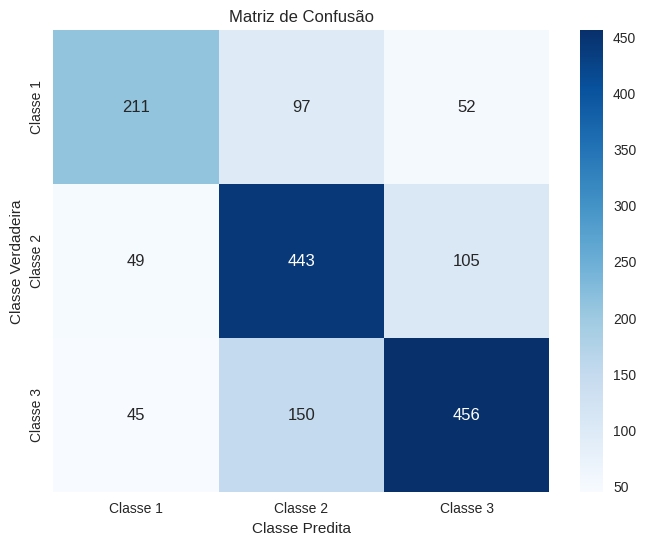

In [ ]:
cm = confusion_matrix(y_teste, predicao_numerica_xgb)
classes = ['Classe 1', 'Classe 2', 'Classe 3']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot
=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.title('Matriz de Confusão')
plt.show()

### importar para arquivo pkl

In [ ]:
# with open('random_forest_sprint3.pkl', 'wb') as arquivo:
#     pickle.dump(rfc, arquivo)
# with open('random_forest_sprint3.pkl', 'rb') as arquivo:
#     random_forest_sprint3 = pickle.load(arquivo)

## XGboost - Validação cruzada (Cross Validation)

- Neste código, estarei aplicando a validação cruzada para buscar obter melhores valores

In [ ]:
from sklearn.model_selection import cross_val_predict

# Realizar a validação cruzada e obter as predições
predicoes_cv = cross_val_predict(modelo_xgb, bow_model, sentimento, cv=7)

# Decodificar as classes preditas
predicoes_cv_decodificadas = encoder.inverse_transform(predicoes_cv)

print(classification_report(sentimento, predicoes_cv_decodificadas))

              precision    recall  f1-score   support

           0       0.67      0.57      0.61      1970
           1       0.60      0.69      0.64      2918
           2       0.70      0.67      0.68      3152

    accuracy                           0.65      8040
   macro avg       0.66      0.64      0.65      8040
weighted avg       0.66      0.65      0.65      8040



## XGboost - Grid Search (Hiperparâmetros)

- Agora, irei tentar aplicar o GridSearch, especificando alguns parâmetros, para que obtenha um melhor resultado

In [ ]:
# Definir a grade de valores para os hiperparâmetros a serem testados
parametros = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Criar uma instância do modelo XGBoost
modelo_xgb = xgb.XGBClassifier()

# Criar uma instância do objeto GridSearchCV
grid = GridSearchCV(modelo_xgb, parametros, cv=5, scoring='accuracy', n_jobs=-1)

# Treinar o modelo com a busca exaustiva de hiperparâmetros
grid.fit(X_treino, y_treino)

# Exibir os resultados da busca exaustiva
print('Melhores hiperparâmetros:', grid.best_params_)

# Criar um novo modelo com os melhores hiperparâmetros encontrados
modelo_xgb = xgb.XGBClassifier(**grid.best_params_)
modelo_xgb.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao_numerica_xgb = modelo_xgb.predict(X_teste)

# Decodificar as classes preditas
predicao_xgb = encoder.inverse_transform(predicao_numerica_xgb)

print(classification_report(y_teste, predicao_xgb))

Melhores hiperparâmetros: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.6}
              precision    recall  f1-score   support

           0       0.68      0.58      0.63       360
           1       0.62      0.75      0.68       597
           2       0.74      0.66      0.70       651

    accuracy                           0.68      1608
   macro avg       0.68      0.66      0.67      1608
weighted avg       0.68      0.68      0.68      1608



### importar arquivo pkl

In [ ]:
# with open('random_forest_sprint3.pkl', 'wb') as arquivo:
#     pickle.dump(rfc, arquivo)
# with open('random_forest_sprint3.pkl', 'rb') as arquivo:
#     random_forest_sprint3 = pickle.load(arquivo)

## Resultados:

- Percebemos que o modelo XGboost não foi tão qualitativo para fazer o desenvolvimento do projeto, já que a métrica que estamos utilizando é o Recall e o resultado foi de apenas 53%, sendo que outros modelos que desenvolvemos foram muito melhores. 
- Assim, existem outros métodos, como da Rede Neural, que são mais qualitativos para a abordagem do projeto.
- Por este motivo, também não habilitei para fazer a exportação para arquivo Pickle.

# 6. Pycaret

O PyCaret executa uma comparação automatizada de vários algoritmos de aprendizado de máquina com várias métricas de validação para selecionar o melhor modelo para um determinado problema. Ele oferece a opção de escolher o modelo com o melhor desempenho com base em métricas como precisão, recall, F1-score, AUC-ROC, entre outras. Dessa forma, o PyCaret ajuda a simplificar e agilizar o processo de seleção de modelos para cientistas de dados e analistas de negócios.

In [ ]:
bow.head()

,0,1,2,3,4,5,6,7,8,9,...,18450,18451,18452,18453,18454,18455,18456,18457,18458,sentimento
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bow = bow.dropna()

In [ ]:
df_bow

,0,1,2,3,4,5,6,7,8,9,...,18450,18451,18452,18453,18454,18455,18456,18457,18458,sentimento
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
target = df_bow['sentimento']
features = df_bow.iloc[:, 0:18459 ]
features

,0,1,2,3,4,5,6,7,8,9,...,18449,18450,18451,18452,18453,18454,18455,18456,18457,18458
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Combinar as features e o target em um único DataFrame
data = pd.concat([features, target], axis=1)

# Inicializar o ambiente PyCaret
clf = setup(data=data, target='sentimento', verbose=False)

# Comparar e avaliar vários modelos
best_model = compare_models()

# Treinar o modelo escolhido
tuned_model = tune_model(best_model)

# Avaliar o modelo no conjunto de teste
predictions = predict_model(tuned_model, data=data)

# Exibir a tabela de resultados
print(predictions)

# Gerar o relatório de classificação
classification_report = classification_report(predictions['sentimento'], predictions['Label'])
print(classification_report)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6910,0.8365,0.6910,0.6936,0.6901,0.5249,0.5263,80.2950
xgboost,Extreme Gradient Boosting,0.6786,0.8381,0.6786,0.6854,0.6782,0.5068,0.5098,1262.3770
et,Extra Trees Classifier,0.6770,0.8301,0.6770,0.6826,0.6726,0.4983,0.5024,72.6760
svm,SVM - Linear Kernel,0.6757,0.0000,0.6757,0.6776,0.6750,0.5017,0.5028,39.5970
lightgbm,Light Gradient Boosting Machine,0.6686,0.8304,0.6686,0.6732,0.6682,0.4921,0.4943,35.0190
rf,Random Forest Classifier,0.6645,0.8311,0.6645,0.6752,0.6586,0.4773,0.4830,58.2110
gbc,Gradient Boosting Classifier,0.6439,0.8048,0.6439,0.6605,0.6432,0.4526,0.4600,300.4330
ridge,Ridge Classifier,0.6423,0.0000,0.6423,0.6456,0.6415,0.4499,0.4516,46.6820
dt,Decision Tree Classifier,0.6411,0.7300,0.6411,0.6418,0.6372,0.4451,0.4477,40.6400
ada,Ada Boost Classifier,0.5853,0.7231,0.5853,0.6124,0.5825,0.3635,0.3759,62.7330


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,04:40:24
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
